## APS 2 - Transferência de Calor

### Luca Mizrahi, Gustavo Oliveira, Arthur Tamm

#### Tarefa 3

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K = 1 # m^2/s
alpha = 1 # m/s
T = 3 # s
Q = 100 # kg / ms
Lx = 30 # m
Ly = 20 # m
a = 1 / 1.4 # m
b = 60 / 6 # m


delta_t = 0.01 # s
delta_x = math.sqrt(delta_t * 4*K) + 0.1  # m
delta_y = delta_x # m

tempo = np.arange(0, 10*T, delta_t)

# Construir matriz de condições iniciais. Lembrando que o que é i no código é j na teoria, e vice versa.
l = round(Lx/delta_x) + 1
c = int(Ly/delta_y) + 1
C = np.zeros((c, l))

In [3]:
tempo = np.arange(0, 10, delta_t)
Cf = C.copy()
Cp = C.copy()
Erro = np.zeros((l, c))

for t in range(0, len(tempo)):
    for i in range(0, l - 1):
        for j in range(0, c - 1):
            x = j
            y = i
            if i==0:
                y=1
            if i==l-1:
                y=l-2
            if j==0:
                x=1
            if j==c-1:
                x=c-2
            if t > 3:
                qc = 0
            if( abs(x-a) <= 0.3 and abs(y-b) <= 0.3 ):
                print('entrei na condicao wow!')
                qc = Q / (delta_x * delta_y) # kg / ms
            else: 
                qc = 0

            termo1 = alpha*( (Cp[x+1][y] - C[x-1][y])/(2*delta_x) + np.sin(np.pi/5*j) * (Cp[x][y+1] - C[x][y-1])/(2*delta_y) )
            termo2 = K * ( (Cp[x+1][y] - 2*C[x][y] + Cp[x-1][y])/(delta_x**2) + (Cp[x][y+1] - 2*C[x][y] + Cp[x][y-1])/(delta_y**2) )
            Cf[x][y] = Cp[x][y] + delta_t*(qc - termo1 + termo2)
            
            if C[x][y] < 0:
                C[x][y] = 0
            
    # if(Erro.max() < 0.0001):
    #     print('Convergiu em ', 10*t, ' ms.')
    #     break
    Cp = Cf.copy()
            

entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condicao wow!
entrei na condic

In [4]:
Cp

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 7.12032456e+150, 1.45887806e+151, ...,
        3.95863559e+140, 1.75257621e+140, 0.00000000e+000],
       [0.00000000e+000, 1.65540337e+151, 3.40050466e+151, ...,
        8.79364837e+140, 3.90759603e+140, 0.00000000e+000],
       ...,
       [0.00000000e+000, 8.62092533e+147, 1.76449358e+148, ...,
        9.07347823e+137, 4.00535635e+137, 0.00000000e+000],
       [0.00000000e+000, 4.34167453e+147, 8.77763062e+147, ...,
        4.48016662e+137, 1.95781515e+137, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

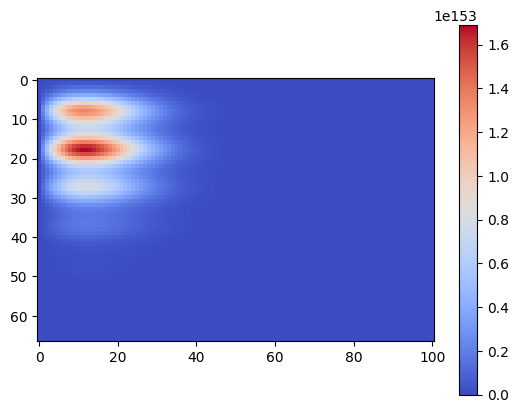

In [5]:
plt.imshow(Cf, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Adicione uma barra de cores

# Mostre o mapa de calor
plt.show()